C:\Users\qrJos\AppData\Local\Temp\ipykernel_9036\2629096942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=league_avg_rating, x="Rating", y="League", palette="viridis")


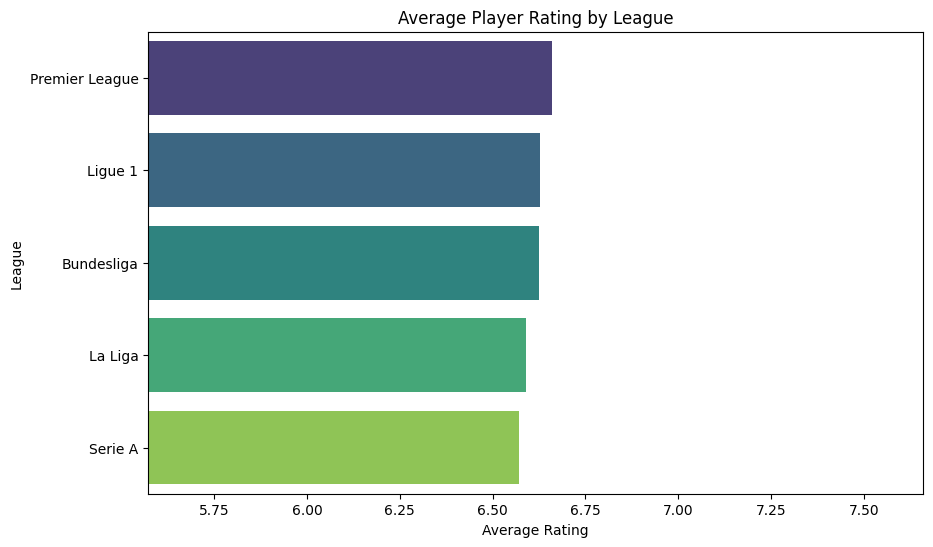

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("finalized_players.csv")

# Group by league and calculate the mean rating
league_avg_rating = df.groupby("League")["Rating"].mean().reset_index()

# Sort by rating for better visualization
league_avg_rating = league_avg_rating.sort_values(by="Rating", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=league_avg_rating, x="Rating", y="League", palette="viridis")

# Labels and title
plt.xlabel("Average Rating")
plt.ylabel("League")
plt.title("Average Player Rating by League")
plt.xlim(league_avg_rating["Rating"].min() - 1, league_avg_rating["Rating"].max() + 1)

# Show plot
plt.show()


In [2]:
# Read in the dataset
df = pd.read_csv("finalized_players.csv")

# Ensure 'Rating' is numeric
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop NaN values in 'Rating' column if necessary
df = df.dropna(subset=['Rating'])

# Initialize 'Adjusted Rating' as a copy of 'Rating' to prevent NaNs for non-defenders
df['Adjusted Rating'] = df['Rating']

# Calculate mean and standard deviation for defenders only
mean_rating = df[df['Pos'] == 'DF']['Rating'].mean()
std_rating = df[df['Pos'] == 'DF']['Rating'].std()

# Check if standard deviation is 0
if std_rating == 0:
    print("Standard deviation is 0, variance increase cannot be applied.")
else:
    # Calculate z-scores for defenders only
    z_ratings = (df[df['Pos'] == 'DF']['Rating'] - mean_rating) / std_rating

    # Increase variance by scaling z-scores (factor > 1)
    scaling_factor = 1.3  # Adjust the factor based on how much you want to increase the variance
    scaled_z_ratings = z_ratings * scaling_factor

    # Revert to the original scale with increased variance for defenders only
    df.loc[df['Pos'] == 'DF', 'Adjusted Rating'] = mean_rating + scaled_z_ratings * std_rating

    # Sort the dataframe by adjusted ratings (now including defenders' updated ratings)
    df_sorted = df.sort_values(by='Adjusted Rating', ascending=False)

    for season, season_df in df_sorted.groupby('Season'):
        print(f"\nTop players for the {season} season:")
        print(season_df[['Player Name', 'Pos', 'Rating', 'Adjusted Rating']].head(20))



Top players for the 2021-2022 season:
                 Player Name Pos  Rating  Adjusted Rating
2464  Trent Alexander-Arnold  DF    7.51         7.778568
2608            João Cancelo  DF    7.43         7.674568
2643            Ben Chilwell  DF    7.42         7.661568
2701         Kevin De Bruyne  MF    7.64         7.640000
3442      Nico Schlotterbeck  DF    7.39         7.622568
3006          Joshua Kimmich  MF    7.60         7.600000
3163              Joël Matip  DF    7.35         7.570568
2697         Alphonso Davies  DF    7.31         7.518568
3386                   Rodri  MF    7.44         7.440000
2962             Reece James  DF    7.24         7.427568
3325            Ivan Perišić  DF    7.22         7.401568
2652         Jonathan Clauss  DF    7.22         7.401568
2575          Gleison Bremer  DF    7.22         7.401568
3434           Téji Savanier  MF    7.40         7.400000
2781             Nabil Fekir  MF    7.38         7.380000
2765       Christian Eriksen  MF 

In [5]:
df['Adjustment'] = df['Adjusted Rating'] - df['Rating']
df.to_csv('adjusted_ratings.csv', index=False)

In [7]:
df.columns

Index(['Player Name', 'Pos', 'Squad', 'League', '90s', 'Tkl', 'TklW',
       'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Chl-Tkl', 'Att', 'Tkl%', 'Chl-Lost',
       'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'CrdY', 'CrdR',
       '2CrdY', 'Fls', 'Off', 'Crs', 'PKcon', 'OG', 'Recov', 'Won', 'Lost',
       'Won%', 'Season', 'Rating', 'Adjusted Rating', 'Adjustment'],
      dtype='object')

In [6]:
average_players = df.copy()

df_players = average_players[average_players["Pos"].str.contains("DF", na=False)]
non_df_players = average_players[~average_players["Pos"].str.contains("DF", na=False)]

# Compute the average ratings
avg_rating_df = df_players["Adjusted Rating"].mean()
avg_rating_non_df = non_df_players["Adjusted Rating"].mean()

print(f"Average Rating of DF players: {avg_rating_df:.2f}")
print(f"Average Rating of Non-DF players: {avg_rating_non_df:.2f}")

std_rating_df = df_players["Adjusted Rating"].std()
std_rating_non_df = non_df_players["Adjusted Rating"].std()

print(f"Std Dev Rating of DF players: {std_rating_df:.2f}")
print(f"Std Dev Rating of Non-DF players: {std_rating_non_df:.2f}")


Average Rating of DF players: 6.61
Average Rating of Non-DF players: 6.62
Std Dev Rating of DF players: 0.28
Std Dev Rating of Non-DF players: 0.28


In [29]:
df.to_csv("var_adjusted_player_ratings.csv", index=False)

C:\Users\qrJos\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [17:07:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.6227

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       255
           1       0.53      0.44      0.48       239
           2       0.63      0.66      0.64       211

    accuracy                           0.62       705
   macro avg       0.61      0.62      0.62       705
weighted avg       0.61      0.62      0.62       705



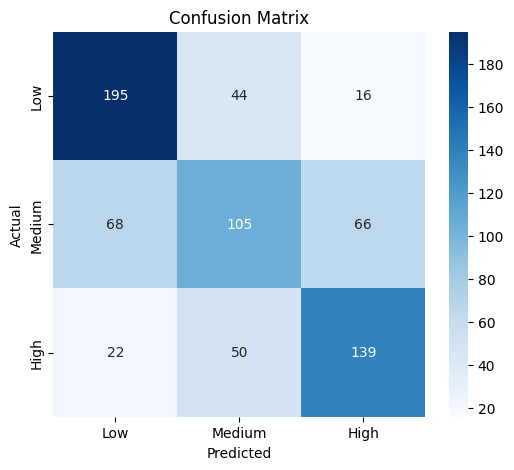

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (assuming it's a DataFrame named df)
# df = pd.read_csv("path_to_your_data.csv")
df['Rating'] = df['Adjusted Rating']
# Feature Engineering (as defined before)
def feature_engineering(df):
    df['Defensive_Efficiency'] = (df['Tkl'] + df['Blocks'] + df['Int']) / df['90s']
    df['Offensive_Contribution'] = (df['Att 3rd'] + df['Crs'] + df['Sh']) / df['90s']
    df['Tactical_Contribution'] = df['TklW'] + (df['Tkl%'] * df['Tkl'])
    df['Penalty_Risk'] = (df['CrdY'] + df['CrdR'] + df['PKcon']) / df['90s']
    df['Defensive_Interaction'] = df['Tkl'] + df['Blocks'] + df['Int']
    #df['Seasonal_Trend'] = df.groupby('Season')['Rating'].transform(lambda x: x.diff()).fillna(0)
    df['Win_Ratio'] = df['Won'] / (df['Won'] + df['Lost'])
    return df

df = feature_engineering(df)

# Define features
features = ['Defensive_Efficiency', 'Offensive_Contribution', 'Tactical_Contribution', 
            'Penalty_Risk', 'Defensive_Interaction', 'Win_Ratio', '90s', 'Tkl', 'TklW', 
            'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Chl-Tkl', 'Att', 'Tkl%', 'Chl-Lost', 'Blocks', 'Sh', 'Pass', 'Int', 
            'Tkl+Int', 'Clr', 'Err', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Off', 'Crs', 'PKcon', 'OG', 'Recov', 'Won', 'Lost']

X = df[features]
y = df['Rating']

# Convert Rating into Categories (Low, Medium, High)
num_bins = 3  # Adjust if needed
binning = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')
y_binned = binning.fit_transform(y.values.reshape(-1, 1)).astype(int)  # Convert to integer classes

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# XGBoost Classifier with Given Parameters
xgb_clf = XGBClassifier(
    n_estimators=700,
    max_depth=3,
    learning_rate=0.0605487138909333,
    subsample=0.6177495307302218,
    colsample_bytree=0.6524095821589513,
    reg_alpha=0.6304827381123799,
    reg_lambda=0.023966067481592194,
    min_child_weight=8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# Train the Model
xgb_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = xgb_clf.predict(X_val_scaled)

# Evaluate Model
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Low", "Medium", "High"], yticklabels=["Low", "Medium", "High"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
X.columns

Index(['Defensive_Efficiency', 'Offensive_Contribution',
       'Tactical_Contribution', 'Penalty_Risk', 'Defensive_Interaction',
       'Win_Ratio', '90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Chl-Tkl', 'Att', 'Tkl%', 'Chl-Lost', 'Blocks', 'Sh', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Off', 'Crs',
       'PKcon', 'OG', 'Recov', 'Won', 'Lost'],
      dtype='object')

In [16]:
df_1 = pd.get_dummies(df, columns=['Pos'], drop_first=True)
df_1

,Squad,League,90s,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Chl-Tkl,Att,...,Adjusted Rating,Defensive_Efficiency,Offensive_Contribution,Tactical_Contribution,Penalty_Risk,Defensive_Interaction,Win_Ratio,"Pos_DF,MF",Pos_MF,"Pos_MF,DF"
0,Bournemouth,Premier League,13.7,29,19,20,7,2,20,34,...,6.140568,3.357664,1.459854,1724.2,0.145985,46,0.312500,False,False,False
1,Reims,Ligue 1,30.9,64,35,36,23,5,26,45,...,6.816568,4.983819,1.294498,3734.2,0.161812,154,0.622449,False,False,False
2,Lens,Ligue 1,16.9,21,14,8,10,3,8,18,...,6.220000,2.662722,0.414201,946.4,0.295858,45,0.222222,False,True,False
3,Lorient,Ligue 1,31.8,85,52,43,34,8,38,96,...,6.910000,5.503145,1.509434,3418.0,0.125786,175,0.517241,False,True,False
4,Betis,La Liga,15.6,25,19,15,9,1,17,34,...,6.348568,4.038462,2.051282,1269.0,0.256410,63,0.583333,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,Salernitana,Serie A,15.7,21,15,9,7,5,11,19,...,6.360000,2.675159,5.859873,1230.9,0.191083,42,0.320000,True,False,False
3648,West Ham,Premier League,23.1,11,6,8,3,0,4,7,...,6.777568,3.290043,1.168831,634.1,0.043290,76,0.617284,False,False,False
3649,Real Sociedad,La Liga,18.3,20,10,12,8,0,12,18,...,6.348568,3.442623,0.546448,1344.0,0.437158,63,0.546667,False,False,False
3650,Real Sociedad,La Liga,28.8,52,25,19,30,3,22,44,...,6.760000,4.548611,0.625000,2625.0,0.138889,131,0.724138,False,True,False


In [43]:
print(list(X.columns))

['90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Chl-Tkl', 'Att', 'Tkl%', 'Chl-Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Off', 'Crs', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%', 'Adjusted Rating', 'Pos_DF,MF', 'Pos_MF', 'Pos_MF,DF']


In [66]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import optuna

df = pd.read_csv("finalized_players.csv")
df = df.dropna(subset=['Rating'])

# Initialize 'Adjusted Rating' as a copy of 'Rating' to prevent NaNs for non-defenders
df['Adjusted Rating'] = df['Rating']

# Calculate mean and standard deviation for defenders only
mean_rating = df[df['Pos'] == 'DF']['Rating'].mean()
std_rating = df[df['Pos'] == 'DF']['Rating'].std()

# Calculate z-scores for defenders only
z_ratings = (df[df['Pos'] == 'DF']['Rating'] - mean_rating) / std_rating

# Increase variance by scaling z-scores (factor > 1)
scaling_factor = 1.3  # Adjust the factor based on how much you want to increase the variance
scaled_z_ratings = z_ratings * scaling_factor

# Revert to the original scale with increased variance for defenders only
df.loc[df['Pos'] == 'DF', 'Adjusted Rating'] = mean_rating + scaled_z_ratings * std_rating


#df = df[df['Pos'].str.contains("DF", na=False)]
df = df.drop(columns=['Player Name'], errors="ignore")  # Remove identifier column

# One-hot encode categorical columns
categorical_cols = ['Squad', 'League', 'Season', 'Pos']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Fill missing values
df = df.fillna(df.median())

#df = pd.get_dummies(df, columns=['Pos'], drop_first=True)

# Drop Season columns if needed
#df = df.drop(df.filter(like="Season").columns, axis=1)
#df = df.drop(df.filter(like="Squad").columns, axis=1)
#df = df.drop(df.filter(like="League").columns, axis=1)

# Split data into features (X) and target (y)
X = df.drop(columns=['Rating', 'Adjusted Rating'], errors="ignore")
y = df['Rating']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # Train model
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Validate performance
    y_pred = model.predict(X_val)
    return r2_score(y_val, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_model = xgb.XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate performance on test set
y_pred_test = best_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred_test)
final_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MAE: {final_mae:.4f}")

[I 2025-04-10 17:37:46,693] A new study created in memory with name: no-name-e59ed602-b37a-4883-875e-510f7890e74b
[I 2025-04-10 17:37:48,233] Trial 0 finished with value: 0.6124418919786077 and parameters: {'n_estimators': 600, 'max_depth': 4, 'learning_rate': 0.017319143407150725, 'subsample': 0.6172471869232525, 'colsample_bytree': 0.9023598649974631, 'reg_alpha': 0.0030245851752071593, 'reg_lambda': 0.065977852149802, 'min_child_weight': 7}. Best is trial 0 with value: 0.6124418919786077.
[I 2025-04-10 17:37:51,225] Trial 1 finished with value: 0.5390338563667187 and parameters: {'n_estimators': 900, 'max_depth': 9, 'learning_rate': 0.09085870184027753, 'subsample': 0.5599067459037368, 'colsample_bytree': 0.6707982681260438, 'reg_alpha': 1.3008596597217361, 'reg_lambda': 4.212413546745801, 'min_child_weight': 10}. Best is trial 0 with value: 0.6124418919786077.
[I 2025-04-10 17:37:51,974] Trial 2 finished with value: 0.5829449754993167 and parameters: {'n_estimators': 200, 'max_dept

Best Hyperparameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.026530420017592753, 'subsample': 0.575781078692327, 'colsample_bytree': 0.9177562917735094, 'reg_alpha': 0.0015766333876246288, 'reg_lambda': 0.44121008756401636, 'min_child_weight': 9}
Final R² Score: 0.6374
Final MAE: 0.1148


In [67]:
from sklearn.model_selection import cross_validate

# Define the model with best hyperparameters from Optuna
best_model = xgb.XGBRegressor(**best_params, random_state=42)

# Perform cross-validation
cv_results = cross_validate(best_model, X, y, cv=5, scoring=('r2', 'neg_mean_absolute_error'))

# Print cross-validation results
print("Cross-validation R² scores:", cv_results['test_r2'])
print("Cross-validation MAE scores:", -cv_results['test_neg_mean_absolute_error'])  # MAE is negative due to how scoring works

# Calculate the average R² score and MAE across folds
avg_r2 = cv_results['test_r2'].mean()
avg_mae = -cv_results['test_neg_mean_absolute_error'].mean()  # Negative to positive conversion for MAE

print(f"Average Cross-Validation R² Score: {avg_r2:.4f}")
print(f"Average Cross-Validation MAE: {avg_mae:.4f}")


Cross-validation R² scores: [0.5671031  0.58093743 0.55764927 0.57444222 0.62533271]
Cross-validation MAE scores: [0.12101981 0.12189572 0.11852558 0.11787711 0.11906832]
Average Cross-Validation R² Score: 0.5811
Average Cross-Validation MAE: 0.1197


In [72]:
print(list(X.columns))

['90s', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Chl-Tkl', 'Att', 'Tkl%', 'Chl-Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'CrdY', 'CrdR', '2CrdY', 'Fls', 'Off', 'Crs', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%', 'Squad_Alavés', 'Squad_Almería', 'Squad_Angers', 'Squad_Arminia', 'Squad_Arsenal', 'Squad_Aston Villa', 'Squad_Atalanta', 'Squad_Athletic Club', 'Squad_Atlético Madrid', 'Squad_Augsburg', 'Squad_Auxerre', 'Squad_Barcelona', 'Squad_Bayern Munich', 'Squad_Betis', 'Squad_Bochum', 'Squad_Bologna', 'Squad_Bordeaux', 'Squad_Bournemouth', 'Squad_Brentford', 'Squad_Brest', 'Squad_Brighton', 'Squad_Burnley', 'Squad_Cagliari', 'Squad_Celta Vigo', 'Squad_Chelsea', 'Squad_Clermont Foot', 'Squad_Cremonese', 'Squad_Crystal Palace', 'Squad_Cádiz', 'Squad_Darmstadt 98', 'Squad_Dortmund', 'Squad_Eint Frankfurt', 'Squad_Elche', 'Squad_Empoli', 'Squad_Espanyol', 'Squad_Everton', 'Squad_Fiorentina', 'Squad_Freiburg', 'Squad_Frosinone', 'Squad_Fulham', 'Squad_Genoa', 

In [39]:
# Add Player Name back to the sorted dataframe
df_sorted['Player Name'] = player_names.loc[df_sorted.index].values

# Display the sorted dataframe by 'Adjusted Rating' including Player Name
print("\nSorted DataFrame with Player Name:")
print(df_sorted[['Player Name', 'Pos', 'Rating', 'Adjusted Rating']].head(20))

# Optionally, export the sorted dataframe to a CSV
df_sorted.to_csv("sorted_player_ratings.csv", index=False)

# Optionally, export predictions DataFrame to CSV (already done earlier)
# predictions_df.to_csv("player_predictions.csv", index=False)


NameError: name 'player_names' is not defined

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import optuna

df = pd.read_csv("finalized_players.csv")
df = df.dropna(subset=['Rating'])

# Initialize 'Adjusted Rating' as a copy of 'Rating' to prevent NaNs for non-defenders
df['Adjusted Rating'] = df['Rating']

# Calculate mean and standard deviation for defenders only
mean_rating = df[df['Pos'] == 'DF']['Rating'].mean()
std_rating = df[df['Pos'] == 'DF']['Rating'].std()

# Calculate z-scores for defenders only
z_ratings = (df[df['Pos'] == 'DF']['Rating'] - mean_rating) / std_rating

# Increase variance by scaling z-scores (factor > 1)
scaling_factor = 1.3  # Adjust the factor based on how much you want to increase the variance
scaled_z_ratings = z_ratings * scaling_factor

# Revert to the original scale with increased variance for defenders only
df.loc[df['Pos'] == 'DF', 'Adjusted Rating'] = mean_rating + scaled_z_ratings * std_rating


#df = df[df['Pos'].str.contains("DF", na=False)]
df = df.drop(columns=['Player Name'], errors="ignore")  # Remove identifier column

# One-hot encode categorical columns
categorical_cols = ['Squad', 'League', 'Season', 'Pos']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Fill missing values
df = df.fillna(df.median())

#df = pd.get_dummies(df, columns=['Pos'], drop_first=True)

# Drop Season columns if needed
#df = df.drop(df.filter(like="Season").columns, axis=1)
#df = df.drop(df.filter(like="Squad").columns, axis=1)
#df = df.drop(df.filter(like="League").columns, axis=1)

# Split data into features (X) and target (y)
X = df.drop(columns=['Rating', 'Adjusted Rating'], errors="ignore")
y = df['Rating']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10)
    }

    # Train model
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Validate performance
    y_pred = model.predict(X_val)
    return r2_score(y_val, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

# Print best parameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final model with best parameters
best_model = xgb.XGBRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Evaluate performance on test set
y_pred_test = best_model.predict(X_test)
final_r2 = r2_score(y_test, y_pred_test)
final_mae = mean_absolute_error(y_test, y_pred_test)

print(f"Final R² Score: {final_r2:.4f}")
print(f"Final MAE: {final_mae:.4f}")